# **Health Insurance Cost Analysis**
## **AIPI 510 - Sourcing Data for Analytics | Project #1** 
### **Lindsay Gross and Arnav Mahale**



**Dataset link:** https://www.kaggle.com/datasets/mosapabdelghany/medical-insurance-cost-dataset


**Dataset title:** Medical Insurance Cost Dataset


**Collaborators:** Mosap Abdel-Ghany (Owner)


**License:** CC0: Public Domain


In [39]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeCV, LassoCV
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score
from pathlib import Path
import seaborn as sns

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


#### **Disclaimer: Ethical Considerations**
- Dataset may underrepresent certain regions or demographics.
- Charges reflect systemic healthcare cost inequities.
- Features like 'smoker' may reinforce stigma if misused.
- Always consider fairness when applying models to policy or pricing

In [2]:
#  Load Data 
df = pd.read_csv("insurance_fe.csv")

# **Exploratory Data Analysis**

### **Explanation of the Content of Dataset**:


Each row represents a single individual, and each column contains the following attributes related to the customer’s demographics, health, and insurance charges.
<br>
<br>
**age**: Age of the individual (numeric, in years)
<br>
<br>
**sex**: Gender of the individual (male, female)
<br>
<br>
**bmi**: Body Mass Index (numeric, weight in kg divided by square of height in meters, a measure of body fatness)
<br>
<br>
**children**: Number of children/dependents covered by the insurance plan (integer)
<br>
<br>
**smoker**: Smoking status of the individual (yes, no)
<br>
<br>
**region**: Residential region of the individual in the U.S. (northeast, northwest, southeast, southwest)
<br>
<br>
**charges**: The medical insurance cost billed to the individual (numeric, in USD)
<br>
<br>
**obese**: Indicator of whether the individual is obese based on BMI (1 = obese, 0 = not obese)
<br>
<br>
**age_group**: Categorical grouping of age ranges (e.g., 18–30, 31–45, 46-60, 61+.)
<br>
<br>

In [3]:
# Check Data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   sex        1338 non-null   object 
 2   bmi        1338 non-null   float64
 3   children   1338 non-null   int64  
 4   smoker     1338 non-null   object 
 5   region     1338 non-null   object 
 6   charges    1338 non-null   float64
 7   obese      1338 non-null   int64  
 8   age_group  1338 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 94.2+ KB
None


In [4]:
# descriptive statistics
print(df.describe())

               age          bmi     children       charges        obese
count  1338.000000  1338.000000  1338.000000   1338.000000  1338.000000
mean     39.207025    30.663397     1.094918  13270.422265     0.528401
std      14.049960     6.098187     1.205493  12110.011237     0.499379
min      18.000000    15.960000     0.000000   1121.873900     0.000000
25%      27.000000    26.296250     0.000000   4740.287150     0.000000
50%      39.000000    30.400000     1.000000   9382.033000     1.000000
75%      51.000000    34.693750     2.000000  16639.912515     1.000000
max      64.000000    53.130000     5.000000  63770.428010     1.000000


In [5]:
# Check for missing values
print(df.isnull().sum())

age          0
sex          0
bmi          0
children     0
smoker       0
region       0
charges      0
obese        0
age_group    0
dtype: int64


## Charges vs. Smoker Status

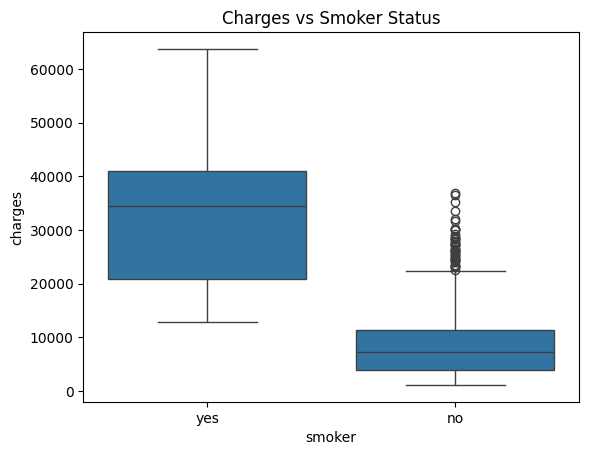

In [6]:
# Charges distribution
sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Charges vs Smoker Status")
plt.show()

## Charges vs. Smoker Status Analysis

The boxplot above compares insurance charges between smokers and non-smokers.  

- **Smokers** have much higher charges, with a median above **$30,000**.  
- **Non-smokers** have a median closer to **$7,000–$8,000**.  
- The spread of charges for smokers is much wider, showing that costs vary a lot depending on individual health conditions.  
- There are also many **outliers** among non-smokers, but their charges are still lower compared to smokers.  

This shows that smoking is one of the strongest factors driving insurance costs in the dataset.  


## Charges vs. Age by Smoker Status

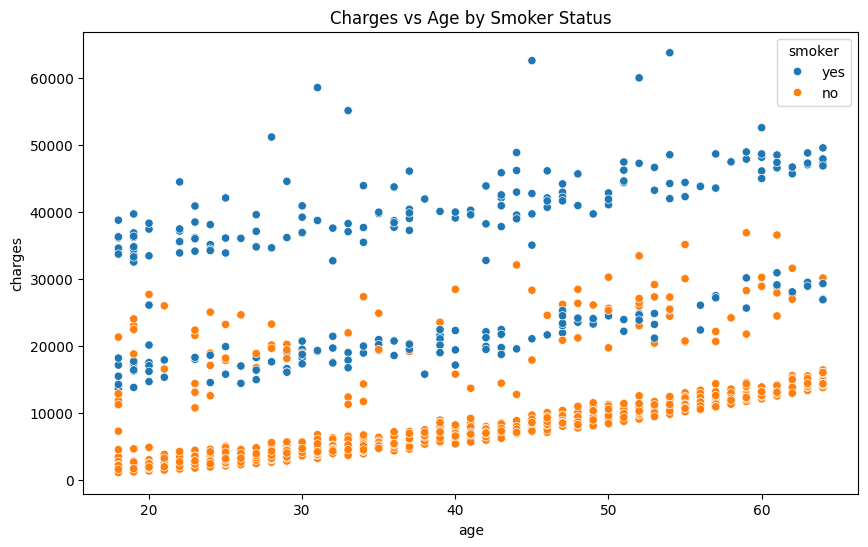

In [19]:
# Visualize charges vs age 
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', hue='smoker', data=df)
plt.title("Charges vs Age by Smoker Status")
plt.show()  

## Charges vs. Age by Smoker Status Analysis

The scatterplot above shows how insurance charges vary by age and smoker status.  

- **Smokers (blue points)** consistently have much higher charges than non-smokers at every age group.  
- For both smokers and non-smokers, charges tend to **increase with age**, which makes sense as older individuals usually face higher health risks.  
- The gap between smokers and non-smokers is very large, with smokers often paying **two to three times more** in charges.  
- There is also high variability among smokers, with some individuals incurring extremely high costs (above **$50,000**).  

This confirms that **age and smoking together** are two of the most important predictors of insurance charges in the dataset.  


## Charges vs Region

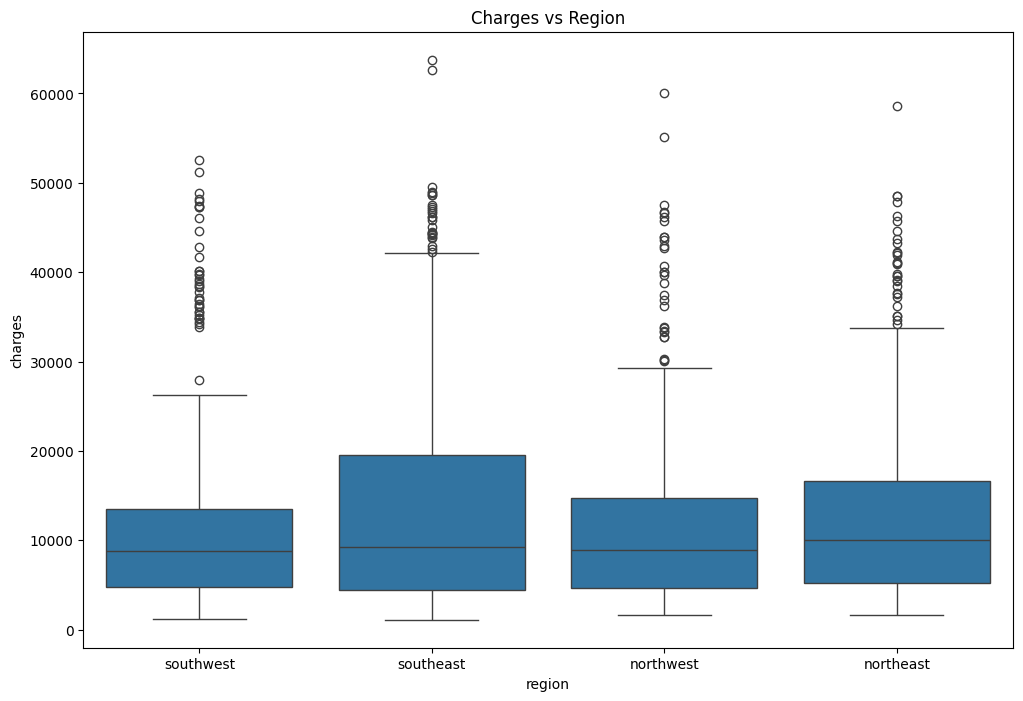

In [34]:
# visualize demographics vs charges
plt.figure(figsize=(12, 8))
sns.boxplot(x='region', y='charges', data=df)
plt.title("Charges vs Region")
plt.show()

## Charges vs Region Analysis

The boxplot above shows how insurance charges vary across the four regions (southwest, southeast, northwest, northeast).  

- The **median charges** are fairly similar across all regions, generally around **$9,000–$10,000**.  
- The **southeast region** shows a slightly higher spread in charges compared to other regions.  
- All regions have a large number of **outliers** (individuals with very high charges above **$40,000**).  
- Overall, region does not seem to be a strong predictor of charges compared to other factors like smoking status.  

This suggests that geographic location has only a small effect on insurance charges in this dataset.


## Charges vs Sex

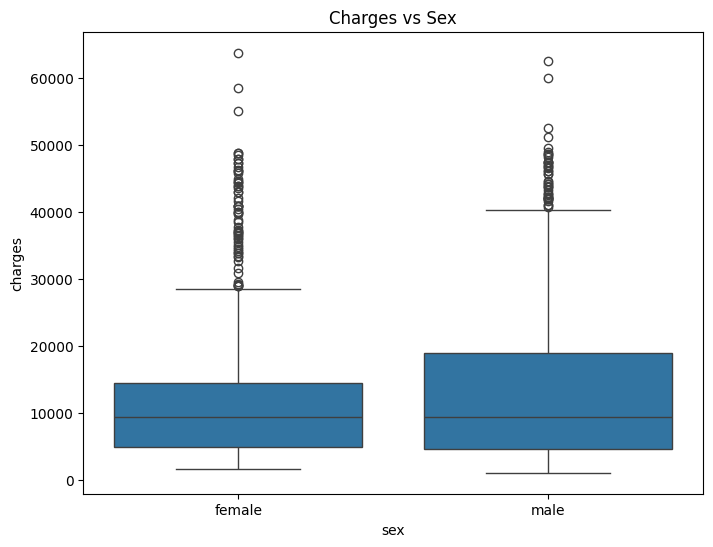

In [35]:
# visualize sex vs charges
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='charges', data=df)
plt.title("Charges vs Sex")
plt.show()

## Charges vs Sex Analysis

The boxplot above shows how insurance charges vary across the two sexes.

- The **median charges** are fairly similar across both genders, generally around **$9,000–$10,000**.
- The **male sex** shows a slightly higher spread in charges compared to **female**.
- Both sexes have a large number of outliers
  - females have outliers starting at **$30,000**.

  - males have outliers starting at **$40,000**.
- Overall, sex does not seem to be a strong predictor of charges compared to other factors like smoking status.

This suggests that demographic location has only a small effect on insurance charges in this dataset.

## Charges vs Number of Children

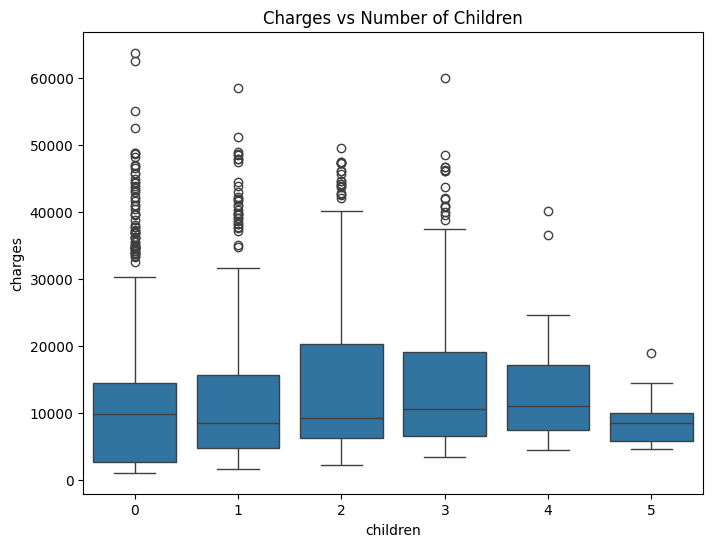

In [37]:
#visualize # of children vs charges
plt.figure(figsize=(8, 6))
sns.boxplot(x='children', y='charges', data=df)
plt.title("Charges vs Number of Children")
plt.show()

## Charges vs Sex Analysis

The boxplot above shows how insurance charges vary by number of children.

- The **median charges** are fairly similar across both genders, generally around **$9,000–$10,000**.
- The **2-children** category shows a slightly higher spread in charges compared to the rest.
- The 0, 1, 2, and 3-children cateogires have a large number of outliers starting around **$30,000**.
- Overall, number of children does not seem to be a strong predictor of charges compared to other factors like smoking status.

This suggests that demographic location has only a small effect on insurance charges in this dataset.

## Charges vs Number of Children and Sex

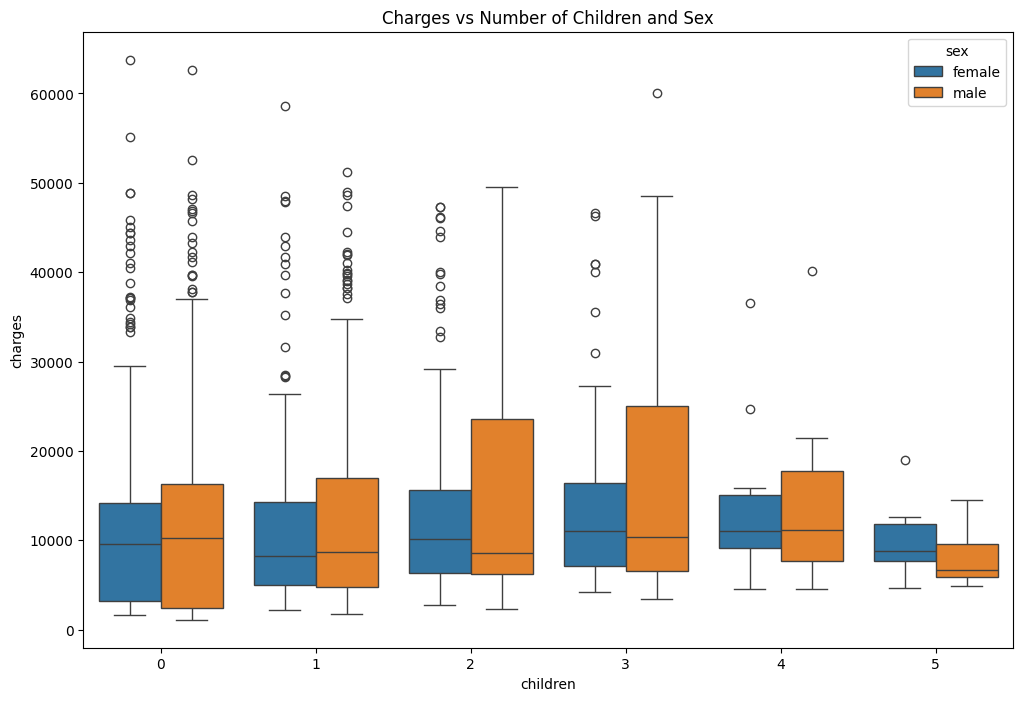

In [38]:
# visualize women vs men with # of children and charges
plt.figure(figsize=(12, 8))
sns.boxplot(x='children', y='charges', hue='sex', data=df)
plt.title("Charges vs Number of Children and Sex")
plt.show()

### Charges vs Number of Children and Sex Analysis

This boxplot shows how insurance charges vary by the number of children, separated by sex.  
For 0–3 children, the median charges generally increase or stay stable, and males often have slightly higher charges than females.  

After 3 children, the median charges appear to go down for both sexes. This drop is likely due to **small sample sizes** in the dataset for families with 4 or 5 children, making those groups less representative and more sensitive to outliers.  

**Key takeaway:** While charges seem higher for families with up to 3 children, the decline after that should not be over-interpreted since it may reflect dataset imbalance rather than a true trend.


## Correlation Heatmap

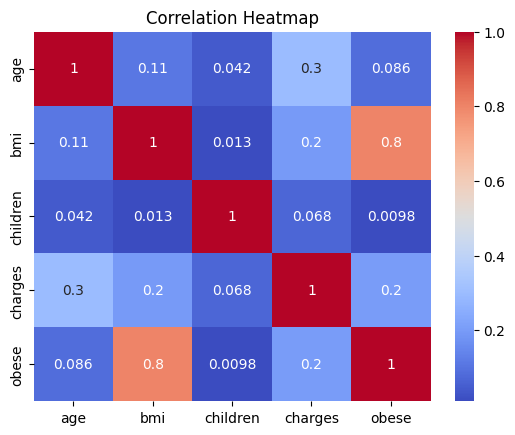

In [24]:
# Correlation heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## Correlation Heatmap Analysis

The heatmap shows correlations between numerical variables:
- Age (0.30) and BMI (0.20) both have weak–moderate positive correlations with charges.
- Children (0.07) shows almost no relationship with charges.
- Obese (0.80 with BMI) is strongly correlated by design, confirming the engineered feature.

Age and BMI matter somewhat, but most variation in charges is explained by categorical factors like smoking.

## Charges vs BMI

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


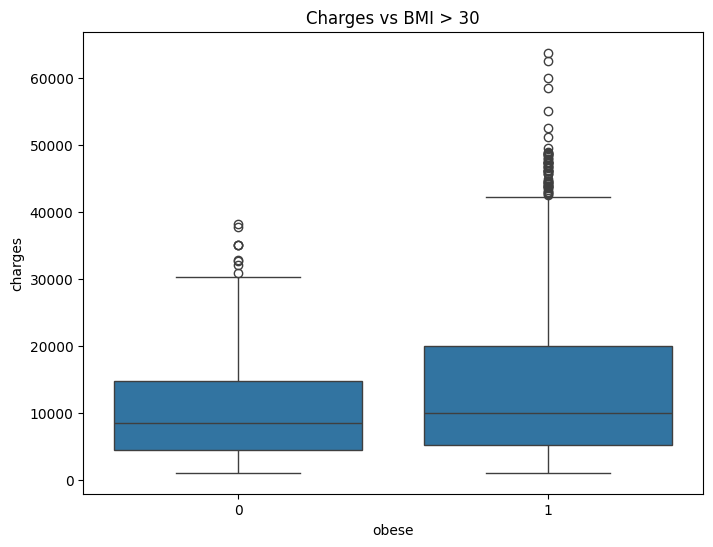

In [122]:
# visualize overweight vs charges
plt.figure(figsize=(8, 6))
sns.boxplot(x='obese', y='charges', data=df)
plt.title("Charges vs BMI > 30")
plt.show()

## Charges vs BMI Analysis

The boxplot compares charges for people with BMI < 30 (0) vs BMI ≥ 30 (1):
- Obese individuals generally face higher charges, with a median above $10,000 compared to around $8,000 for non-obese.
- The spread is wider for the obese group, showing more variation and more high-cost outliers (above $40,000).
- While obesity matters, the difference is smaller than factors like smoking.

Obesity is linked to higher and more variable charges, but it’s a weaker predictor than smoking.

## Charges vs Age Group

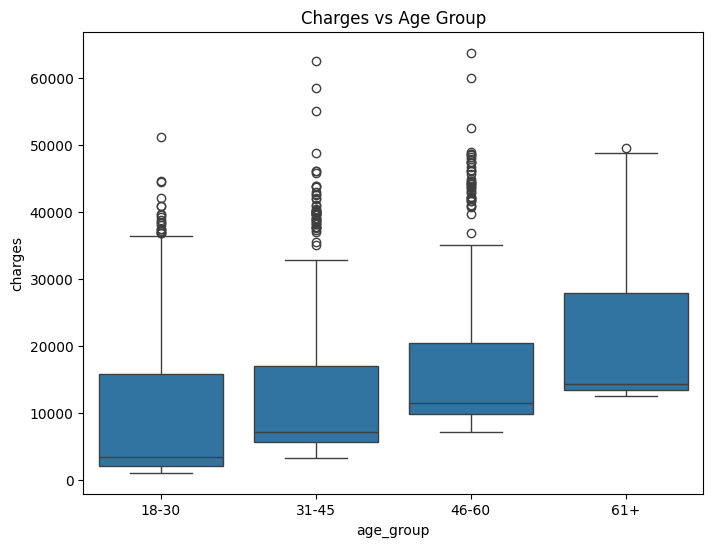

In [123]:
# visualize age vs charges
plt.figure(figsize=(8, 6))
sns.boxplot(x='age_group', y='charges', data=df)
plt.title("Charges vs Age Group")
plt.show()

## Charges vs Age Group Analysis

The boxplot compares charges across age groups (18–30, 31–45, 46–60, 61+):
- Median charges increase steadily with age, from below $5,000 in the 18–30 group to over $15,000 in the 61+ group.
- The spread of charges also grows with age, showing greater variability in older groups.
- Outliers exist at all ages, but high-cost cases (above $40,000) are more common in older groups.

Age is a clear driver of higher insurance charges, with costs rising consistently as people get older.

## Charges vs Age Group and Sex

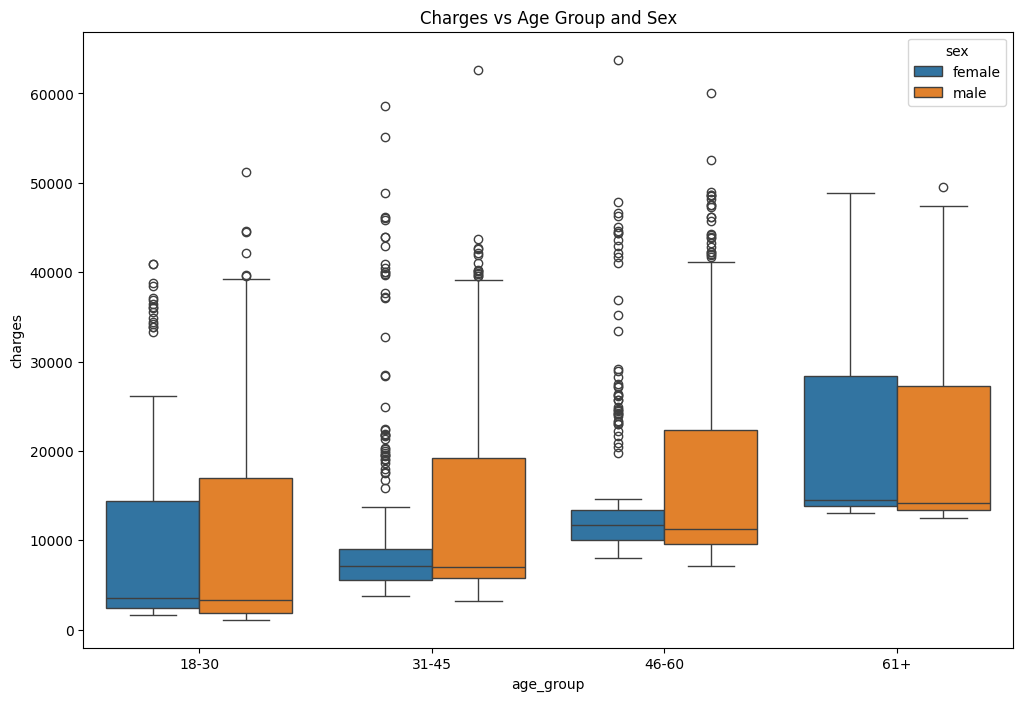

In [124]:
# visualize different age groups of women vs men and charges
plt.figure(figsize=(12, 8))
sns.boxplot(x='age_group', y='charges', hue='sex', data=df)
plt.title("Charges vs Age Group and Sex")
plt.show()

## Charges vs Age Group and Sex Analysis

The boxplot compares charges by age group, split by sex:
- Charges rise with age for both males and females, peaking in the 61+ group.
- In the younger groups (18–45), males tend to have slightly higher and more variable charges than females.
- By 61+, male and female charges are nearly identical, with large spreads and many outliers above $40,000.
- Outliers are present in all groups, but become more common and extreme as age increases.

Age is the dominant driver of costs, while sex shows only small differences that diminish in older age groups.

## Ranking each Feature by Importance

In [129]:
# Preprocessing for OneHotEncode modeling
X = df.drop(columns=['charges', 'age_group'])
y = df['charges'].astype(float).to_numpy()

X_train, X_rest, y_train, y_rest = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_rest, y_rest, test_size=0.5, random_state=42)

categorical_cols = [c for c in X.columns if X[c].dtype == "object"]
numeric_cols = [c for c in X.columns if c not in categorical_cols]

preprocessor = ColumnTransformer(
  transformers=[
    ('num', MinMaxScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
  ])

X_train_pre = preprocessor.fit_transform(X_train)
X_val_pre = preprocessor.transform(X_val)
X_test_pre = preprocessor.transform(X_test)

try:
  num_names = numeric_cols
  cat_names = preprocessor.named_transformers_["cat"].get_feature_names_out(categorical_cols).tolist()
  feature_names = num_names + cat_names
except Exception:
  feature_names = [f"f{i}" for i in range(X_train_pre.shape[1])]

print(feature_names)


['age', 'bmi', 'children', 'obese', 'sex_female', 'sex_male', 'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']



Performance
 Train | MAE: 4,245.77 | RMSE: 6048.84
   Val | MAE: 4,160.91 | RMSE: 5554.96
  Test | MAE: 4,436.02 | RMSE: 6135.09

Feature Rankings by Importance:
smoker_yes                     w=14443.21347
age                            w=10342.35330
smoker_no                      w=-9108.08927
obese                          w=3737.38705
bmi                            w=2804.60565
sex_female                     w=2680.61030
sex_male                       w=2654.48326
children                       w=2018.47810
region_northeast               w=1732.24934
region_northwest               w=1342.71057
region_southeast               w=1290.39753
region_southwest               w=969.77652


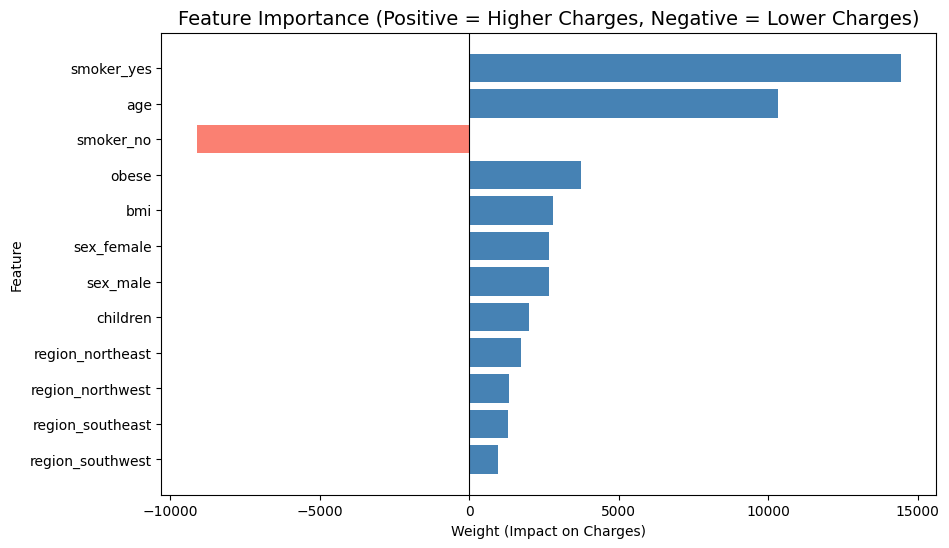

In [130]:
# Gradient Descent
# (code referenced from an old personal project and modified using ChatGPT to work with this dataset on Sept 29th @ 4:30pm)
import matplotlib.pyplot as plt
import numpy as np
def gradient_descent(X_train, y_train, X_val=None, y_val=None, lr=5e-3, num_iters=10000, l2=1e-6, tol=1e-7, patience=500):
  n, d = X_train.shape
  rng = np.random.default_rng(42)
  w = rng.normal(loc=0.0, scale=0.01, size=d)
  b = 0.0

  best_val = np.inf
  best_w, best_b = w.copy(), b
  no_improve = 0

  for t in range(1, num_iters+1):
    y_hat = X_train.dot(w) + b
    err = y_hat - y_train

    grad_w = (2.0 / n) * np.dot(X_train.T, err) + 2.0 * l2 * w
    grad_b = (2.0 / n) * err.sum()

    w -= lr * grad_w
    b -= lr * grad_b

    if X_val is not None and y_val is not None and (t % 50 == 0 or t == num_iters):
      val_mae = mean_absolute_error(y_val, X_val.dot(w) + b)
      if val_mae + tol < best_val:
        best_val = val_mae
        best_w, best_b = w.copy(), b
        no_improve = 0
      else:
        no_improve += 50
      if no_improve >= patience:
        w, b = best_w.copy(), best_b
        break
  
  return w, b

def predict(name, X, y, w, b):
  y_pred = X.dot(w) + b
  mae = mean_absolute_error(y, y_pred)
  rmse = np.sqrt(np.mean((y_pred - y)**2))
  print(f"{name:>6} | MAE: {mae:,.2f} | RMSE: {rmse:.2f}")

# Train and Evaluate
w, b = gradient_descent(X_train_pre, y_train, X_val_pre, y_val, lr=5e-3, num_iters=10000, l2=1e-6)

print("\nPerformance")
predict("Train", X_train_pre, y_train, w, b)
predict("  Val", X_val_pre, y_val, w, b)
predict(" Test", X_test_pre, y_test, w, b)

# Feature Importance
topk = 12
index = np.argsort(np.abs(w))[::-1][:topk]
print(f"\nFeature Rankings by Importance:")
for i in index:
  print(f"{feature_names[i]:30s} w={w[i]:.5f}")

# add bar chart to visualize feature importance
index = np.argsort(np.abs(w))[::-1]
sorted_features = [feature_names[i] for i in index]
sorted_weights = [w[i] for i in index]

colors = ["steelblue" if val > 0 else "salmon" for val in sorted_weights]

plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_weights, color=colors)
plt.axvline(0, color="black", linewidth=0.8)
plt.title("Feature Importance (Positive = Higher Charges, Negative = Lower Charges)", fontsize=14)
plt.xlabel("Weight (Impact on Charges)")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.show()

### Model Performance and Feature Importance

Our regression model achieved fairly consistent performance across train, validation, and test sets:

- **MAE:** ~\$4,200–\$4,400  
- **RMSE:** ~\$5,500–\$6,100  

This means the model predicts overall trends well, but still makes errors of a few thousand dollars on individual cases. 

#### Key Insights from Feature Importance
- **Smoking status** is by far the strongest predictor of charges. Being a smoker increases costs by around \$14,000 compared to non-smokers.
- **Age** is the second most important factor, with charges rising significantly as people get older. 
- **Obesity and BMI** contribute to higher costs, though the effect is smaller than smoking or age.  
- **Sex and number of children** have modest impacts on charges.  
- **Region** influences charges slightly, but the differences are minor compared to lifestyle and health factors.  

**Takeaway:** Smoking and age dominate insurance charges, while other demographic and regional factors play much smaller roles. The model's finding confirm our findings in our above graphs that captured the strong relationship between smoking status and charges and age and charges and the weak relationship between sex, number of children, and region in relation to charges. However, it is important to note that the model captures these broad trends, but is not precise at the individual level. 
